In [1]:
# ===========================================================
# 🚢 Titanic Survival Prediction - ML Pipeline
# Author: Manasa Puellela
# Purpose: Real-world style ML workflow with feature engineering
# ===========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# --- Load Dataset ---
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# --- Basic EDA ---
print("Shape:", df.shape)
df.describe()
df.isnull().sum()


Shape: (891, 12)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# --- Select Features ---
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]
X = df[features]
y = df["Survived"]


In [4]:
# --- Preprocessing ---
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Pclass", "Sex", "Embarked"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [5]:
# --- Build ML Pipeline ---
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# --- Train Model ---
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)


In [7]:
# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



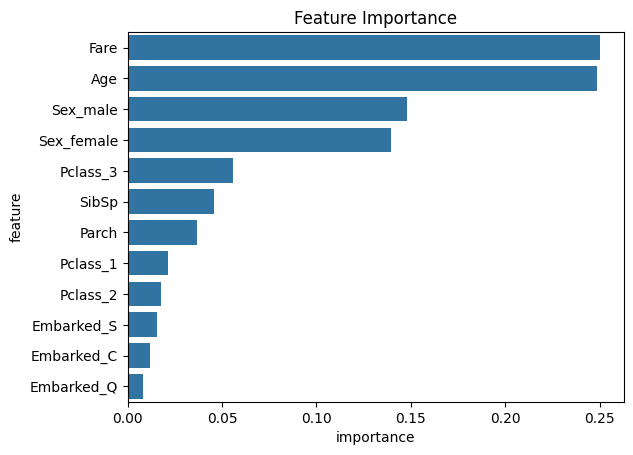

In [8]:
# --- Feature Importance (after preprocessing) ---
model = clf.named_steps["model"]
importances = model.feature_importances_

feature_names = (
    list(numeric_features) +
    list(clf.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['encoder']
         .get_feature_names_out(categorical_features))
)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

sns.barplot(data=importance_df, x="importance", y="feature")
plt.title("Feature Importance")
plt.show()


In [9]:
# --- Save Report ---
results = {
    "accuracy": accuracy_score(y_test, y_pred)
}

pd.DataFrame([results]).to_csv("titanic_results.csv", index=False)
results


{'accuracy': 0.8156424581005587}